# importing required libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Reading data in python environment and viewing first 5 rows

In [9]:
data = pd.read_csv('Country-data.csv')
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


# printing a concise summary of a DataFrame

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


# Checking for null values

In [4]:
data.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

# Obtaining the shape of dataframe,no of rows and columns

In [5]:
data.shape

(167, 10)

'exports', 'health', 'imports' are given in percentage of gdpp. This features would be converted to their actual values.

In [10]:
data['imports']=round((data.imports*data.gdpp)/100)
data['health']=round((data.health*data.gdpp)/100)
data['exports']=round((data.exports*data.gdpp)/100)

In [11]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.0,42.0,248.0,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.0,268.0,1988.0,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1713.0,186.0,1400.0,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.0,101.0,1514.0,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.0,736.0,7186.0,19100,1.44,76.8,2.13,12200


# Viewing basic statistical summary of data

In [12]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.622754,1056.754491,6588.401198,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.902072,1801.410229,14710.816178,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.000000,13.000000,1.000000,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.000000,78.500000,640.000000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.000000,322.000000,2046.000000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,977.000000,7719.500000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8664.000000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


# Data visualization using heat map

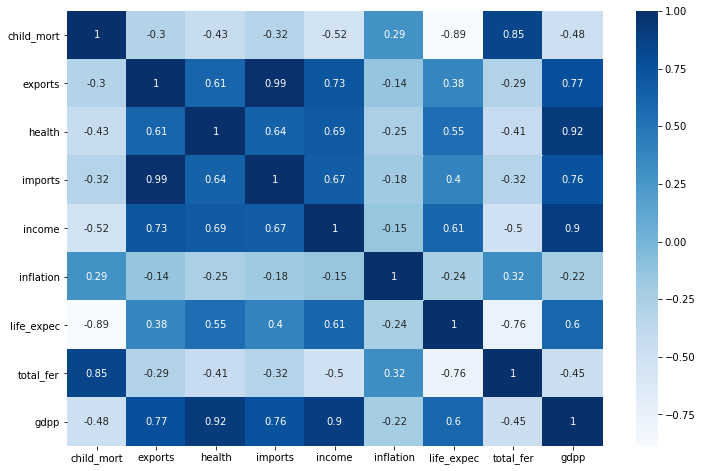

In [13]:
plt.figure(figsize = (12,8))  
sns.heatmap(data.corr(),annot = True, cmap='Blues')
plt.show()

imports and exports (correlation factor = 0.99)
health and gdpp (correlation factor = 0.92)
income and gdpp (correlation factor = 0.9)
life_expce and child_mort (correlation factor = -0.89)
total_fer and child_mort (correlation factor = 0.85)

# Handling Outliers

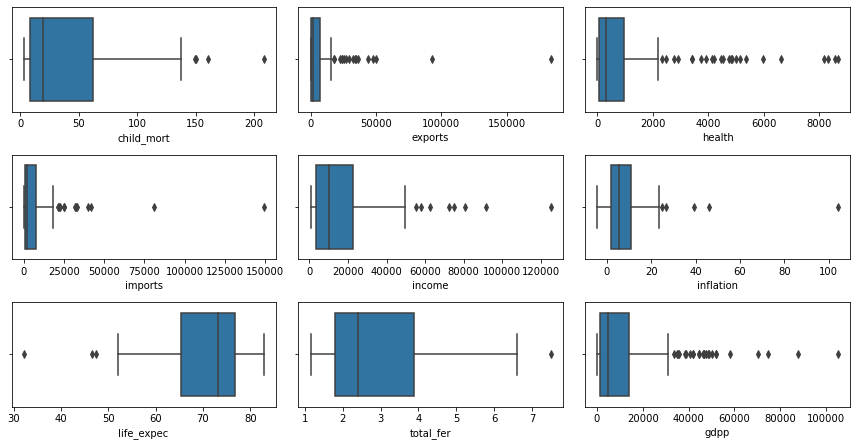

In [16]:
fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(data.drop('country', axis=1).columns):
    plt.subplot(6, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.boxplot(data[feature])
    plt.tight_layout()

Outliers for features like 'child_mort', 'inflation', 'life_expec', 'total_fer' are at critical socio-economic and health conditions (under-developed countries)

Outliers for exports, imports, health, income features are mostly developed countries with better socio-economic and health conditions than rest. (developed countries)



In [24]:
out_data=data.copy()
out_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.0,42.0,248.0,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.0,268.0,1988.0,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1713.0,186.0,1400.0,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.0,101.0,1514.0,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.0,736.0,7186.0,19100,1.44,76.8,2.13,12200


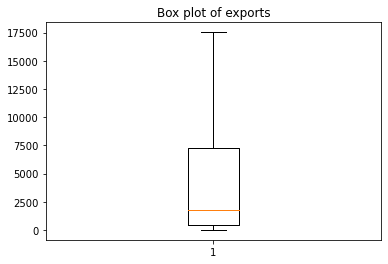

In [31]:
Q1 = out_data['exports'].quantile(0.25)
Q3 = out_data['exports'].quantile(0.75)

IQR = Q3 - Q1

lower_limit = Q1 -(1.5*IQR)
upper_limit = Q3 + (1.5*IQR)
out_data['exports']=np.where(out_data['exports']>upper_limit,upper_limit,np.where(out_data['exports']<lower_limit,lower_limit,out_data['exports']))

plt.boxplot(out_data['exports'])
plt.title('Box plot of exports')
plt.show()


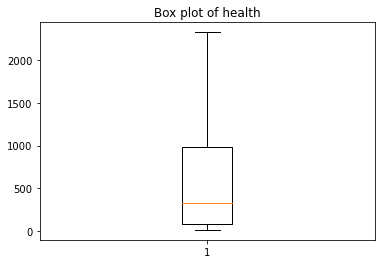

In [32]:
Q1 = out_data['health'].quantile(0.25)
Q3 = out_data['health'].quantile(0.75)

IQR = Q3 - Q1

lower_limit = Q1 -(1.5*IQR)
upper_limit = Q3 + (1.5*IQR)
out_data['health']=np.where(out_data['health']>upper_limit,upper_limit,np.where(out_data['health']<lower_limit,lower_limit,out_data['health']))
plt.boxplot(out_data['health'])
plt.title('Box plot of health')
plt.show()

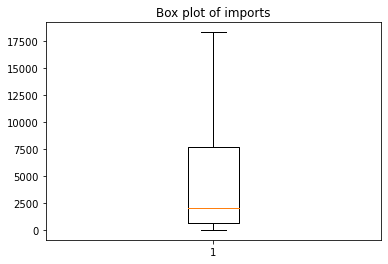

In [33]:
Q1 = out_data['imports'].quantile(0.25)
Q3 = out_data['imports'].quantile(0.75)

IQR = Q3 - Q1

lower_limit = Q1 -(1.5*IQR)
upper_limit = Q3 + (1.5*IQR)
out_data['imports']=np.where(out_data['imports']>upper_limit,upper_limit,np.where(out_data['imports']<lower_limit,lower_limit,out_data['imports']))
plt.boxplot(out_data['imports'])
plt.title('Box plot of imports')
plt.show()

In [34]:
out_data.iloc[:, 1:]

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.0,42.0,248.0,1610,9.44,56.2,5.82,553
1,16.6,1145.0,268.0,1988.0,9930,4.49,76.3,1.65,4090
2,27.3,1713.0,186.0,1400.0,12900,16.10,76.5,2.89,4460
3,119.0,2199.0,101.0,1514.0,5900,22.40,60.1,6.16,3530
4,10.3,5551.0,736.0,7186.0,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,1384.0,156.0,1565.0,2950,2.62,63.0,3.50,2970
163,17.1,3848.0,663.0,2376.0,16500,45.90,75.4,2.47,13500
164,23.3,943.0,90.0,1051.0,4490,12.10,73.1,1.95,1310
165,56.3,393.0,68.0,451.0,4480,23.60,67.5,4.67,1310


# Scaling the data

In [35]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
scaled_data = scalar.fit_transform(out_data.iloc[:,1:])


# Clustering Kmeans

In [36]:
from sklearn.cluster import KMeans
ks=range(1,11)
inertia=[]
for k in ks:
    model=KMeans(n_clusters=k,init="k-means++",random_state=42)
    model.fit(scaled_data)
    inertia.append(model.inertia_)
print(inertia)

[1503.0000000000007, 760.9228202276366, 487.9213538221391, 408.7913191205768, 346.1745999722485, 303.39378763691064, 275.8580070938543, 247.12780747880146, 224.25412336912743, 202.82993105691816]


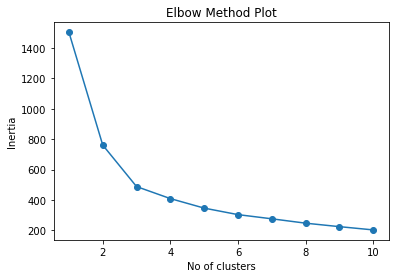

In [37]:
plt.plot(ks,inertia,'-o')
plt.title("Elbow Method Plot")
plt.xlabel('No of clusters')
plt.ylabel('Inertia')
plt.show()

In [45]:
model_kmeans=KMeans(n_clusters=3)
model_kmeans.fit(scaled_data)
km=model_kmeans.predict(scaled_data)
print(model_kmeans.labels_)

[0 1 1 0 1 1 1 2 2 1 2 2 1 1 1 2 1 0 1 1 1 0 1 2 1 0 0 1 0 2 1 0 0 1 1 1 0
 0 0 1 0 1 2 2 2 1 1 1 1 0 0 1 1 2 2 0 0 1 2 0 2 1 1 0 0 1 0 1 2 1 1 1 0 2
 2 2 1 2 1 1 0 0 2 1 0 1 1 0 0 1 1 2 1 0 0 1 1 0 2 0 1 1 1 1 1 1 0 1 0 1 2
 2 0 0 2 1 0 1 1 1 1 1 2 2 1 1 0 1 1 0 1 1 0 2 2 2 0 0 2 2 1 1 0 1 2 2 1 0
 1 0 0 1 1 1 1 0 1 2 2 2 1 1 1 1 1 0 0]


# Implementing hierarchical clustering

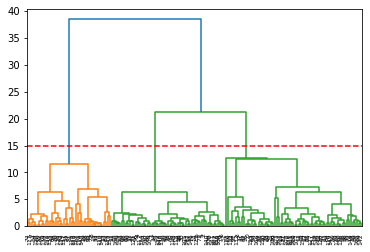

In [42]:
from scipy.cluster.hierarchy import linkage,dendrogram

dendro = linkage(scaled_data,method = 'ward')
dendrogram(dendro, leaf_rotation = 90, leaf_font_size = 6)
plt.hlines(15,0,3000,colors="red",linestyles="dashed")
plt.show()

In [43]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=3,affinity="euclidean",linkage="ward")
aghc=cluster.fit_predict(scaled_data)
aghc

array([0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 1, 1, 0, 2, 2, 1, 2, 0, 0, 0, 2, 0,
       2, 1, 2, 0, 0, 0, 0, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 1,
       1, 2, 2, 0, 2, 0, 0, 1, 0, 1, 1, 0, 0, 2, 1, 0, 1, 2, 0, 0, 0, 0,
       0, 1, 1, 0, 2, 2, 0, 1, 1, 1, 2, 1, 2, 2, 0, 0, 1, 0, 0, 2, 2, 0,
       0, 2, 2, 1, 2, 0, 0, 2, 2, 0, 1, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2,
       1, 1, 0, 0, 1, 1, 0, 2, 2, 2, 0, 2, 1, 1, 2, 2, 0, 0, 1, 0, 2, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 2, 1, 1, 0, 0, 2, 0, 0, 0, 2, 2,
       0, 0, 2, 1, 1, 1, 2, 2, 0, 0, 2, 0, 0], dtype=int64)

Adding two columns to represent the labels obtained from 2 clustering models

In [53]:
country_cluster= out_data.iloc[:,:]
country_cluster= pd.concat([country_cluster, pd.DataFrame(model_kmeans.labels_, columns=['cluster_id_km'])], axis = 1)
country_cluster = pd.concat([country_cluster, pd.DataFrame(cluster.labels_, columns=['cluster_id_hc'])], axis = 1)
country_cluster.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id_km,cluster_id_hc
0,Afghanistan,90.2,55.0,42.0,248.0,1610,9.44,56.2,5.82,553,0,0
1,Albania,16.6,1145.0,268.0,1988.0,9930,4.49,76.3,1.65,4090,1,2
2,Algeria,27.3,1713.0,186.0,1400.0,12900,16.10,76.5,2.89,4460,1,2
3,Angola,119.0,2199.0,101.0,1514.0,5900,22.40,60.1,6.16,3530,0,0
4,Antigua and Barbuda,10.3,5551.0,736.0,7186.0,19100,1.44,76.8,2.13,12200,1,2


In [54]:
print(country_cluster['cluster_id_km'].value_counts())
print(country_cluster['cluster_id_hc'].value_counts())

1    82
0    48
2    37
Name: cluster_id_km, dtype: int64
0    68
2    57
1    42
Name: cluster_id_hc, dtype: int64


Listing the countries in each clusters, formed as a result of hierarchical clustering method

In [55]:
print("Cluster 0 of Hierarchical Clustering model")
print(country_cluster[country_cluster['cluster_id_hc'] == 0].country.unique())

print("Cluster 1 of Hierarchical Clustering model")
print(country_cluster[country_cluster['cluster_id_hc'] == 1].country.unique())

print("Cluster 2 of Hierarchical Clustering model")
print(country_cluster[country_cluster['cluster_id_hc'] == 2].country.unique())

Cluster 0 of Hierarchical Clustering model
['Afghanistan' 'Angola' 'Bangladesh' 'Benin' 'Bhutan' 'Bolivia' 'Botswana'
 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Central African Republic'
 'Chad' 'Comoros' 'Congo, Dem. Rep.' 'Congo, Rep.' "Cote d'Ivoire" 'Egypt'
 'Equatorial Guinea' 'Eritrea' 'Fiji' 'Gabon' 'Gambia' 'Ghana' 'Guatemala'
 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'India' 'Iraq' 'Kenya'
 'Kiribati' 'Kyrgyz Republic' 'Lao' 'Lesotho' 'Liberia' 'Madagascar'
 'Malawi' 'Mali' 'Mauritania' 'Micronesia, Fed. Sts.' 'Mongolia'
 'Mozambique' 'Myanmar' 'Namibia' 'Niger' 'Nigeria' 'Pakistan'
 'Philippines' 'Rwanda' 'Samoa' 'Senegal' 'Sierra Leone' 'Solomon Islands'
 'South Africa' 'Sudan' 'Tajikistan' 'Tanzania' 'Timor-Leste' 'Togo'
 'Tonga' 'Turkmenistan' 'Uganda' 'Vanuatu' 'Venezuela' 'Yemen' 'Zambia']
Cluster 1 of Hierarchical Clustering model
['Australia' 'Austria' 'Bahamas' 'Bahrain' 'Belgium' 'Brunei' 'Canada'
 'Cyprus' 'Czech Republic' 'Denmark' 'Estonia' 'Finland' 'Franc

Listing the countries in each clusters,formed as a result of kmeans clustering method

In [57]:
print("Cluster 0 of KMeans model")
print(country_cluster[country_cluster['cluster_id_km'] == 0].country.unique())

print("Cluster 1 of KMeans model")
print(country_cluster[country_cluster['cluster_id_km'] == 1].country.unique())

print("Cluster 2 of KMeans model")
print(country_cluster[country_cluster['cluster_id_km'] == 2].country.unique())

Cluster 0 of KMeans model
['Afghanistan' 'Angola' 'Benin' 'Botswana' 'Burkina Faso' 'Burundi'
 'Cameroon' 'Central African Republic' 'Chad' 'Comoros' 'Congo, Dem. Rep.'
 'Congo, Rep.' "Cote d'Ivoire" 'Equatorial Guinea' 'Eritrea' 'Gabon'
 'Gambia' 'Ghana' 'Guinea' 'Guinea-Bissau' 'Haiti' 'Iraq' 'Kenya'
 'Kiribati' 'Lao' 'Lesotho' 'Liberia' 'Madagascar' 'Malawi' 'Mali'
 'Mauritania' 'Mozambique' 'Namibia' 'Niger' 'Nigeria' 'Pakistan' 'Rwanda'
 'Senegal' 'Sierra Leone' 'Solomon Islands' 'South Africa' 'Sudan'
 'Tanzania' 'Timor-Leste' 'Togo' 'Uganda' 'Yemen' 'Zambia']
Cluster 1 of KMeans model
['Albania' 'Algeria' 'Antigua and Barbuda' 'Argentina' 'Armenia'
 'Azerbaijan' 'Bangladesh' 'Barbados' 'Belarus' 'Belize' 'Bhutan'
 'Bolivia' 'Bosnia and Herzegovina' 'Brazil' 'Bulgaria' 'Cambodia'
 'Cape Verde' 'Chile' 'China' 'Colombia' 'Costa Rica' 'Croatia'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Estonia' 'Fiji'
 'Georgia' 'Grenada' 'Guatemala' 'Guyana' 'Hungary' 'India' 'Indones

Analysing the clusters and identify the ones which are in dire need of aid.Analysis is based on variables gdpp, child_mort,health,life_expectancy and income,Visualization is done using scatter plot.

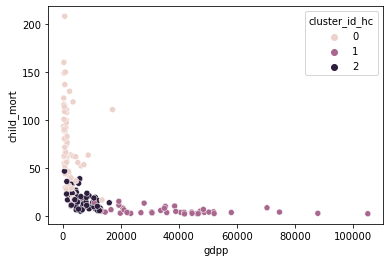

In [58]:
sns.scatterplot(country_cluster['gdpp'],country_cluster['child_mort'],hue=country_cluster['cluster_id_hc'])
plt.show()

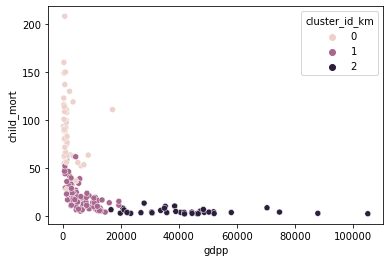

In [59]:
sns.scatterplot(country_cluster['gdpp'],country_cluster['child_mort'],hue=country_cluster['cluster_id_km'])
plt.show()

<AxesSubplot:xlabel='gdpp', ylabel='income'>

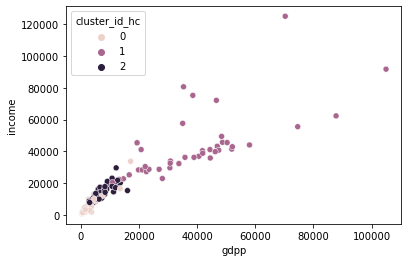

In [60]:
sns.scatterplot(country_cluster['gdpp'],country_cluster['income'],hue=country_cluster['cluster_id_hc'])

<AxesSubplot:xlabel='gdpp', ylabel='income'>

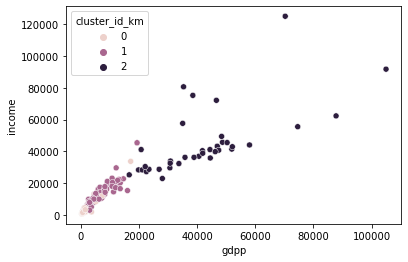

In [62]:
sns.scatterplot(country_cluster['gdpp'],country_cluster['income'],hue=country_cluster['cluster_id_km'])

<AxesSubplot:xlabel='income', ylabel='child_mort'>

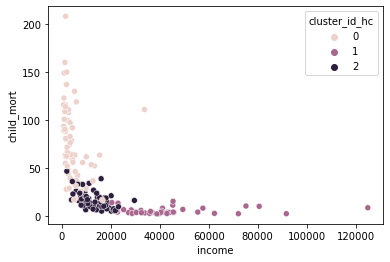

In [63]:
sns.scatterplot(country_cluster['income'],country_cluster['child_mort'],hue=country_cluster['cluster_id_hc'])

<AxesSubplot:xlabel='income', ylabel='child_mort'>

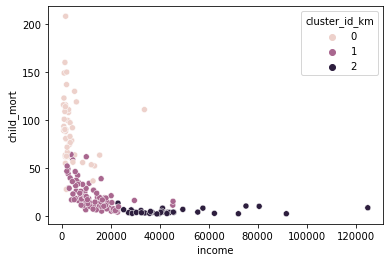

In [64]:
sns.scatterplot(country_cluster['income'],country_cluster['child_mort'],hue=country_cluster['cluster_id_km'])

<AxesSubplot:xlabel='child_mort', ylabel='life_expec'>

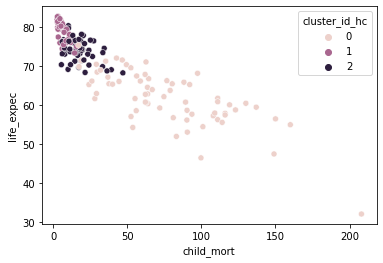

In [65]:
sns.scatterplot(country_cluster['child_mort'],country_cluster['life_expec'],hue=country_cluster['cluster_id_hc'])

<AxesSubplot:xlabel='child_mort', ylabel='life_expec'>

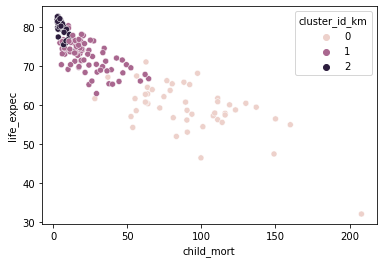

In [66]:
sns.scatterplot(country_cluster['child_mort'],country_cluster['life_expec'],hue=country_cluster['cluster_id_km'])

<AxesSubplot:xlabel='health', ylabel='life_expec'>

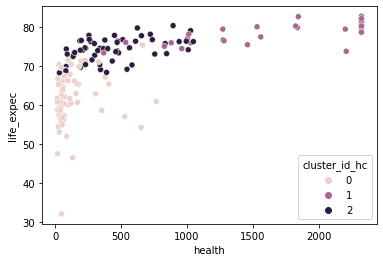

In [69]:
sns.scatterplot(country_cluster['health'],country_cluster['life_expec'],hue=country_cluster['cluster_id_hc'])

<AxesSubplot:xlabel='health', ylabel='life_expec'>

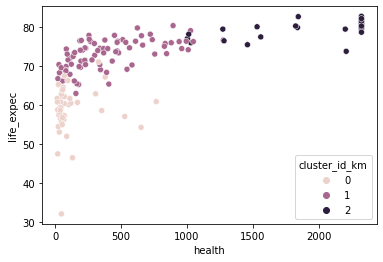

In [70]:
sns.scatterplot(country_cluster['health'],country_cluster['life_expec'],hue=country_cluster['cluster_id_km'])

Conclusion:Hierarchical Clustering model is chosen as final model as Kmeans can produce different results depending on the initial positions of the centroids of the cluster
from the above scatter plots its clear that cluster 0 countries are in the direst need of aid and they are

In [82]:
print("Countries that are in the direst need of aid")
print(country_cluster[country_cluster['cluster_id_hc'] == 0].country.unique())

Countries that are in the direst need of aid
['Afghanistan' 'Angola' 'Bangladesh' 'Benin' 'Bhutan' 'Bolivia' 'Botswana'
 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Central African Republic'
 'Chad' 'Comoros' 'Congo, Dem. Rep.' 'Congo, Rep.' "Cote d'Ivoire" 'Egypt'
 'Equatorial Guinea' 'Eritrea' 'Fiji' 'Gabon' 'Gambia' 'Ghana' 'Guatemala'
 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti' 'India' 'Iraq' 'Kenya'
 'Kiribati' 'Kyrgyz Republic' 'Lao' 'Lesotho' 'Liberia' 'Madagascar'
 'Malawi' 'Mali' 'Mauritania' 'Micronesia, Fed. Sts.' 'Mongolia'
 'Mozambique' 'Myanmar' 'Namibia' 'Niger' 'Nigeria' 'Pakistan'
 'Philippines' 'Rwanda' 'Samoa' 'Senegal' 'Sierra Leone' 'Solomon Islands'
 'South Africa' 'Sudan' 'Tajikistan' 'Tanzania' 'Timor-Leste' 'Togo'
 'Tonga' 'Turkmenistan' 'Uganda' 'Vanuatu' 'Venezuela' 'Yemen' 'Zambia']
